
Prerequisites
-------------

Load eups in conda with:

```
source eups-setups.sh
setup lsst_sims
```

Need a database connection via:

```
ssh -L 51433:fatboy.phys.washington.edu:1433 gateway.astro.washington.edu
```

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.stats import LombScargle

from lsst.sims.catUtils.baseCatalogModels import RRLyStarObj
from lsst.sims.catUtils.utils import StellarLightCurveGenerator, AgnLightCurveGenerator

plt.style.use(['ggplot', 'ggplot_mod.mplstyle', 'notebooks.mplstyle'])

In [101]:
opsimdb_filename = "minion_1016_sqlite.db"
stardb = RRLyStarObj()
lc_gen = StellarLightCurveGenerator(stardb, opsimdb_filename)


raRange = (40.0, 75.0)
decRange = (-20.0, 0.0)
bandpass = ('g', 'r', 'i', 'z')
pointings = lc_gen.get_pointings(raRange, decRange, bandpass=bandpass)

parameters (40.0, 75.0) (-20.0, 0.0) ('g', 'r', 'i', 'z') None


In [ ]:
lc_dict, truth_dict = lc_gen.light_curves_from_pointings(pointings)

In [72]:
len(lc_dict.keys())
#import cPickle
#f = open("rrlyrae_lightcurves.pkl", "w")
#cPickle.dump((lc_dict, truth_dict), f)
#f.close()

In [108]:
single_rrlyrae = lc_dict[lc_dict.keys()[0]]

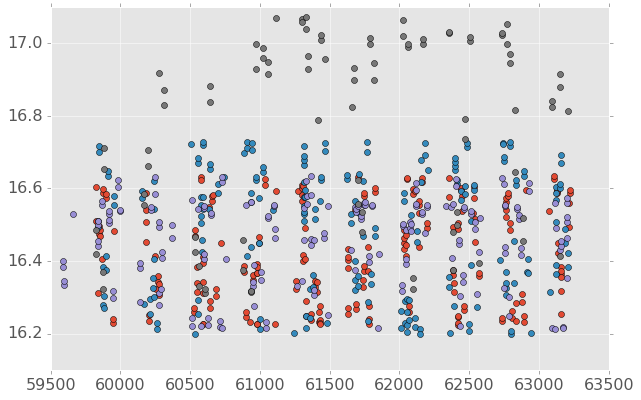

In [109]:
for band, band_data in single_rrlyrae.items():
    plt.plot(band_data['mjd'], band_data['mag'], 'o')

1.39072847682


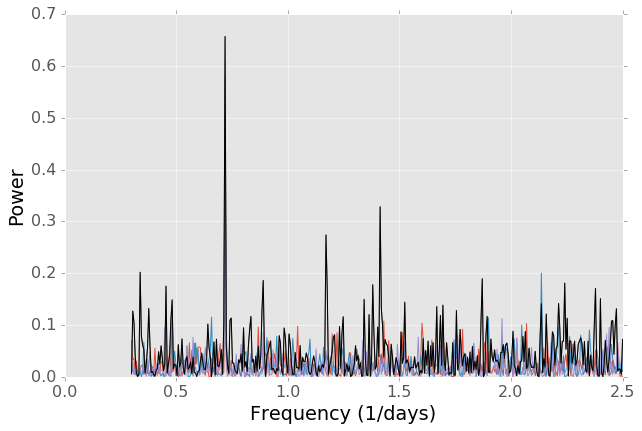

In [116]:
freqs = np.linspace(0.3, 2.5, 400)
total_power = np.zeros(len(freqs))
for band, band_data in single_rrlyrae.items():
    power = LombScargle(band_data['mjd'], band_data['mag']).power(freqs)
    plt.plot(freqs, power)
    total_power =+ power

plt.plot(freqs, total_power, 'k-')
plt.xlabel("Frequency (1/days)")
plt.ylabel("Power")

peak_period = 1/freqs[argmax(total_power)]
print peak_period

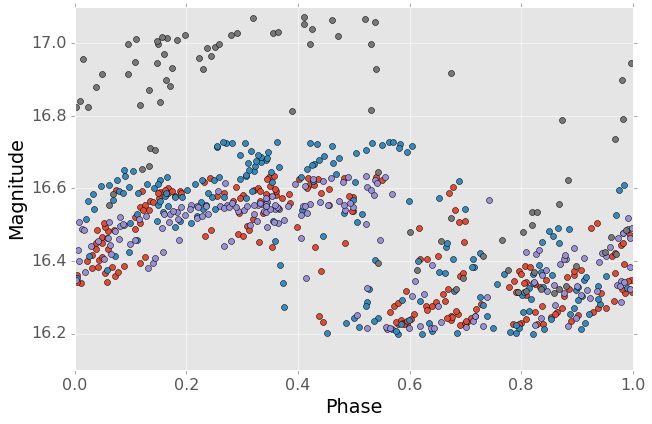

In [117]:
for band, band_data in single_rrlyrae.items():
    phase = (band_data['mjd'] - 60000)/peak_period % 1
    plt.plot(phase, band_data['mag'], 'o')
    
plt.ylabel("Magnitude")
plt.xlabel("Phase")

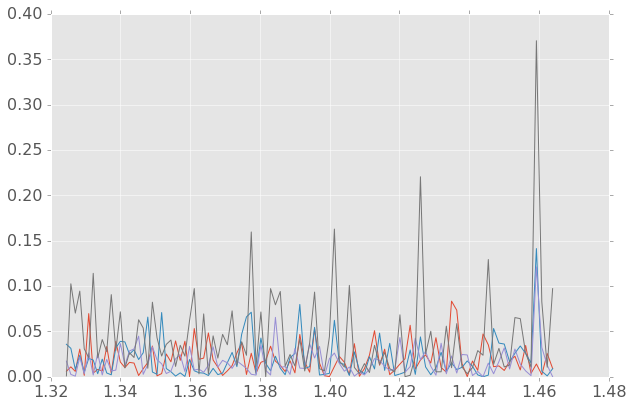

Refined Period:  1.45926994388


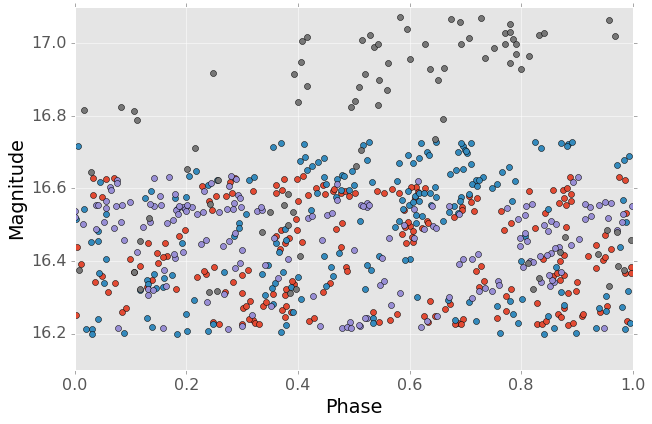

In [162]:
ref_freqs = np.linspace(0.95*freqs[np.argmax(total_power)],
                        1.05*freqs[np.argmax(total_power)], 100)

ref_total_power = np.zeros(len(ref_freqs))
for band, band_data in single_rrlyrae.items():
    power = LombScargle(band_data['mjd'], band_data['mag']).power(ref_freqs)
    plt.plot(1/ref_freqs, power)
    ref_total_power =+ power

plt.show()
refined_period = 1/ref_freqs[np.argmax(ref_total_power)]
print "Refined Period: ", refined_period

for band, band_data in single_rrlyrae.items():
    phase = (band_data['mjd'] - 60000)/refined_period % 1
    plt.plot(phase, band_data['mag'], 'o')

plt.ylabel("Magnitude")
plt.xlabel("Phase")

WFD Supernovae
==========

In [4]:
from lsst.sims.catUtils.utils import SNIaLightCurveGenerator
from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj

In [5]:
catalogdb = GalaxyTileObj()
sn_gen = SNIaLightCurveGenerator(catalogdb, opsimdb_filename)

In [18]:
raRange = (60.0, 65.0)
decRange = (-15.0, -12.0)
bandpass = ('g', 'r', 'i')
# Twinkles: RA 53.01, Dec -27.44

sn_pointings = sn_gen.get_pointings(raRange, decRange, bandpass=bandpass)

parameters (60.0, 65.0) (-15.0, -12.0) ('g', 'r', 'i') None



In [19]:

sn_lc_dict, sn_truth_dict = sn_gen.light_curves_from_pointings(sn_pointings,
                                                               lc_per_field=200)
print "Number of light curves: ", len(sn_lc_dict.keys())

starting query
query took  195.46636796
chunk of  100000  took  29.3887708187
starting query
query took  200.16029191
chunk of  100000  took  26.8516459465
starting query
query took  165.055551052
chunk of  100000  took  25.137966156
light curves took 6.734997e+02 seconds to generate
Number of light curves:  221


In [106]:
first_sn = sn_lc_dict[sn_lc_dict.keys()[0]]

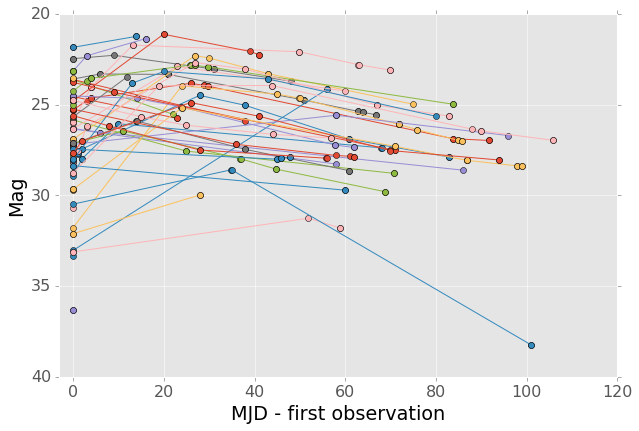

In [186]:
for id in sn_lc_dict.keys()[:20]:
    first_sn = sn_lc_dict[id]
    for band, band_data in first_sn.items():
        if len(band_data['mjd']) == 0:
            continue
        plt.plot(band_data['mjd'] - min(band_data['mjd']), -2.5*np.log10(band_data['flux']), 'o-')

plt.xlim(xmin=-3)
plt.gca().invert_yaxis()
plt.ylabel("Mag")
plt.xlabel("MJD - first observation")

In [82]:

#f = open("sne_lightcurves.pkl", "w")
#cPickle.dump((sn_lc_dict, sn_truth_dict), f)
#f.close()

Deep Drilling
========

In [12]:
raRange = (53, 54)
decRange = (-28.0, -27.0)
bandpass = ('g', 'r', 'i')
# Twinkles: RA 53.01, Dec -27.44

twinkles_pointings = sn_gen.get_pointings(raRange, decRange, bandpass=bandpass)

print "Number of pointings", len(twinkles_pointings)

tw_lc_dict, tw_truth_dict = sn_gen.light_curves_from_pointings(twinkles_pointings,
                                                               lc_per_field=600)
print "Number of light curves: ", len(tw_lc_dict.keys())

parameters (53, 54) (-28.0, -27.0) ('g', 'r', 'i') None
Number of pointings 1
starting query
query took  177.364078999
chunk of  100000  took  490.151745081
light curves took 6.788750e+02 seconds to generate
Number of light curves:  212


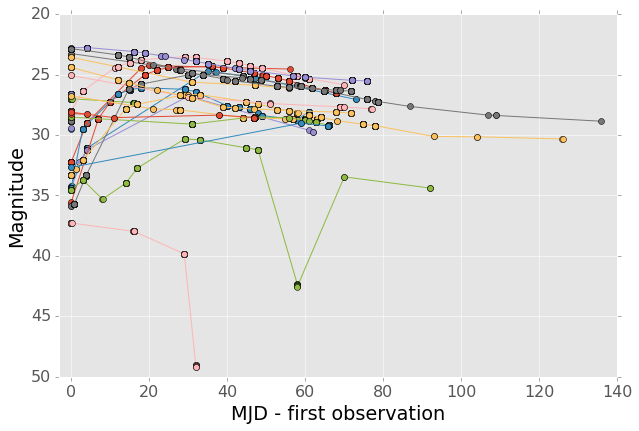

In [184]:
for id in tw_lc_dict.keys()[:10]:
    first_sn = tw_lc_dict[id]
    for band, band_data in first_sn.items():
        if len(band_data['mjd']) == 0:
            continue
        plt.plot(band_data['mjd'] - min(band_data['mjd']), -2.5*log10(band_data['flux']), 'o-')

plt.xlim(xmin=-3)
plt.gca().invert_yaxis()
plt.ylabel("Magnitude")
plt.xlabel("MJD - first observation")

Fitting
=======

In [66]:
import astropy.table
from astropy.table import Table
import sncosmo

def make_photometric_table(lc_dict):
    
    tables = []
    for band, band_dict in lc_dict.items():
        t = Table(band_dict)
        t['band'] = "sdss" + band
        t['zp'] = 26.0
        t['zpsys'] = "ab"
        t.rename_column('error', 'flux_error')
        tables.append(t)
    return astropy.table.vstack(tables)
        

In [81]:
first_twinkles_lc = tw_lc_dict[tw_lc_dict.keys()[9]]
phot_table = make_photometric_table(first_twinkles_lc)
print "table length: ", len(phot_table)
SNR = np.max(phot_table['flux']/phot_table['flux_error'])

if SNR < 5:
    1/0

dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='salt2-extended', effects=[dust, dust], 
                     effect_names=['host', 'mw'], effect_frames=['rest', 'obs'])

result, fitted_model = sncosmo.fit_lc(phot_table, model=model, vparam_names=['z', 't0', 'x0', 'x1', 'c'],
                                      bounds={"z": (0.5, 0.7), "c": (-1, 2)}, modelcov=True)

table length:  570


z: 0.616492
t0: 62013.4
x0: 3.34166e-16
x1: 0.251327
c: -0.052962


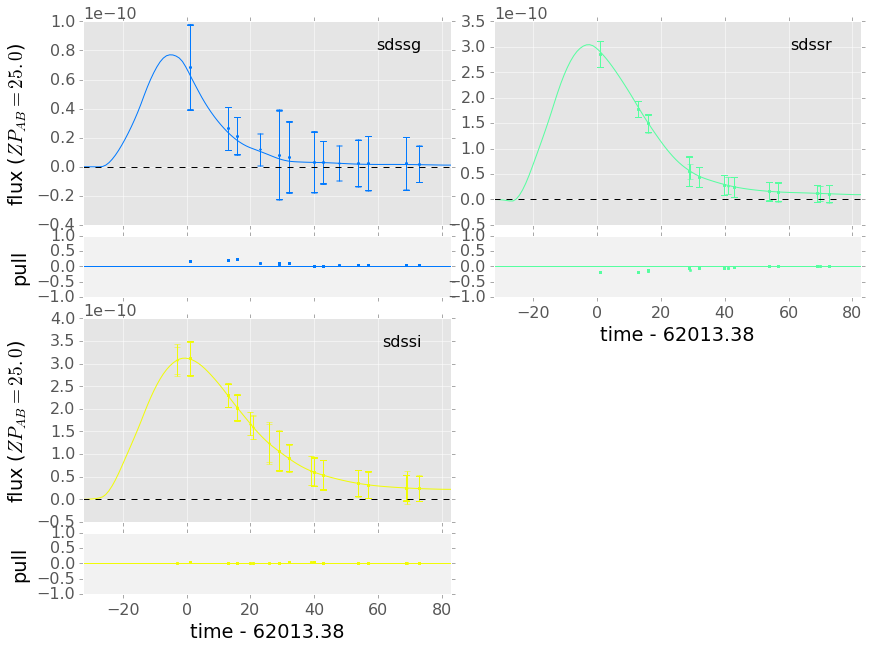

In [104]:
sncosmo.plot_lc(phot_table, model=fitted_model, errors=result.errors,
               xfigsize=12, show_model_params=False)

param_dict = dict(zip(result.param_names, result.parameters))
for param in result.vparam_names:
    print "{:s}: {:g}".format(param, param_dict[param])

In [79]:
tw_truth_dict[tw_lc_dict.keys()[9]]

{'E(B-V)': 0.014377446279235775,
 'c': -0.03173261001990609,
 't0': 62013.41395404622,
 'x0': 8.7266346414969333e-06,
 'x1': 0.10377689226861803,
 'z': 0.61094629764556885}

AGN
===

In [120]:
from lsst.sims.catUtils.baseCatalogModels import Gile

In [132]:

agn_catalogdb = GalaxyTileObj()
agn_lc_gen = AgnLightCurveGenerator(agn_catalogdb, opsimdb_filename)


raRange = (40.0, 43.0)
decRange = (-20.0, -18.0)
bandpass = ('g', 'r', 'i', 'z')
agn_pointings = lc_gen.get_pointings(raRange, decRange, bandpass=bandpass)
print "{:d} pointings".format(len(agn_pointings))

parameters (40.0, 43.0) (-20.0, -18.0) ('g', 'r', 'i', 'z') None
1 pointings


In [179]:
agn_lc_dict, agn_truth_dict = agn_lc_gen.light_curves_from_pointings(agn_pointings, lc_per_field=400)

starting query
query took  96.2607638836
light curves took 2.582955e+04 seconds to generate


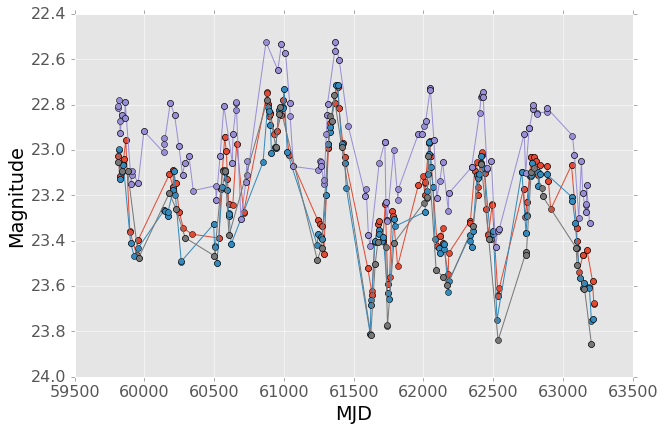

In [148]:
first_agn = agn_lc_dict[agn_lc_dict.keys()[6]]
for band, band_data in first_agn.iteritems():
    plt.plot(band_data['mjd'], band_data['mag'], 'o-')

plt.gca().invert_yaxis()
plt.xlabel("MJD")
plt.ylabel("Magnitude")

In [150]:
sum([len(x['mag']) for x in first_agn.itervalues()])

675

In [181]:
bright_agn = {}
bright_agn_truth = {} 
for agn_key in agn_lc_dict.keys():
    median_mags = np.array([np.median(band_data['mag']) for band_data in agn_lc_dict[agn_key].itervalues()])
    is_bright = np.any(median_mags < 23)
    if is_bright:
        bright_agn[agn_key] = agn_lc_dict[agn_key]
        bright_agn_truth[agn_key] = agn_truth_dict[agn_key]        

In [182]:
len(bright_agn)

23

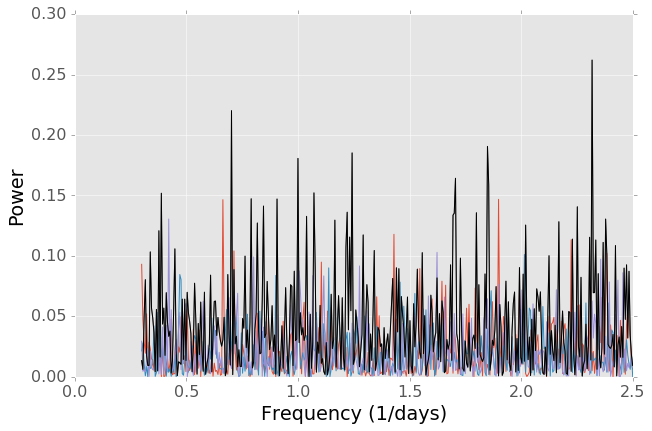

In [183]:
freqs = np.linspace(0.3, 2.5, 400)
total_power = np.zeros(len(freqs))
first_bright_agn = bright_agn[bright_agn.keys()[0]]
for band, band_data in first_bright_agn.items():
    power = LombScargle(band_data['mjd'], band_data['mag']).power(freqs)
    plt.plot(freqs, power)
    total_power =+ power

plt.plot(freqs, total_power, 'k-')
plt.xlabel("Frequency (1/days)")
plt.ylabel("Power")

In [180]:
len(agn_lc_dict)

400